<div dir=ltr align=center>In the name of God</div>
<br>
<font size=6><div dir=ltr align=center>
<font size=5>
Intelligent Analysis of
Biomedical Images
<br>
<font size=4>
sharif university of technology, CE department
</font>
<br>
<font size=3>
Dr. Rohban
</font>
<br>
<br>
<font size=6>
Homework 2
</font><br>
<font size=4>


In the following notebook, we aims to develop a Convolutional Neural Network (CNN) using the PyTorch framework that can accurately detect and classify Brain Tumors from MRI scans. The CNN will be trained on a large dataset of labeled brain tumor images to learn the patterns and features associated with different tumor types.

## <b>1 <span style='color:#e61227'>|</span> reuirements and libraries</b>

Feel free to add any other library you need.


In [1]:
!pip install split-folders
!pip install torch-summary

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='darkgrid')
import copy
import os
import torch
from PIL import Image
from torch.utils.data import Dataset
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn
from torchvision import utils
from torchvision.datasets import ImageFolder
import splitfolders
from torchsummary import summary
import torch.nn.functional as F
import pathlib
from sklearn.metrics import classification_report
import itertools
from tqdm.notebook import trange, tqdm
from torch import optim
import warnings
warnings.filterwarnings('ignore')

## <b>2 <span style='color:#e61227'>|</span> Dataset</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>2.1 |</span></b> Download and load Dataset</b></p>
</div>

In [3]:
! gdown 1hwV1mcc-Bm_AY_t_FG8byxKFmhY4uGsh
! unzip brain.zip

Downloading...
From (original): https://drive.google.com/uc?id=1hwV1mcc-Bm_AY_t_FG8byxKFmhY4uGsh
From (redirected): https://drive.google.com/uc?id=1hwV1mcc-Bm_AY_t_FG8byxKFmhY4uGsh&confirm=t&uuid=8a2dc100-742e-4be9-a5e5-aff5bcec11f6
To: /content/brain.zip
100% 111M/111M [00:01<00:00, 76.3MB/s]
Archive:  brain.zip
   creating: brain/
   creating: brain/val/
   creating: brain/val/Healthy/
  inflating: brain/val/Healthy/Not Cancer  (710).jpg  
  inflating: brain/val/Healthy/Not Cancer  (1600).jpg  
  inflating: brain/val/Healthy/Not Cancer  (1008).jpg  
  inflating: brain/val/Healthy/Not Cancer  (45).jpg  
  inflating: brain/val/Healthy/Not Cancer  (1208).jpg  
  inflating: brain/val/Healthy/Not Cancer  (1069).jpg  
  inflating: brain/val/Healthy/Not Cancer  (11).jpg  
  inflating: brain/val/Healthy/Not Cancer  (1823).jpg  
  inflating: brain/val/Healthy/Not Cancer  (111).jpg  
  inflating: brain/val/Healthy/Not Cancer  (115).jpg  
  inflating: brain/val/Healthy/Not Cancer  (1615).jpg  


In [4]:
%ls

brain/  brain.zip  sample_data/


In [5]:
%ls brain/

train/  val/


In [7]:
%ls brain/train

'Brain Tumor'/   Healthy/


In [6]:
%ls brain/val

'Brain Tumor'/   Healthy/


## <b>3 <span style='color:#e61227'>|</span> Data Preparation </b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>3.1 |</span></b> Splitting Dataset</b></p>
</div>

- We need to evaluate the model on validation datasets to track the model's performance during training. Then, We use 20% of the dataset for the **Validation set** and use the rest as the **Training set**, so we have an **80/20** split!

In [8]:
# Dataset Path
data_dir = '/content/brain'
data_dir = pathlib.Path(data_dir)

In [11]:
# define transformation
# transform images to (256, 256) and normalize them
transform = transforms.Compose(
    [
########################################
          ### TODO ###
    transforms.Resize((256, 256)),  # Resize images to 256x256
    # transforms.Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True),

    # transforms.RandomHorizontalFlip(p=0.5)
    # transforms.RandomVerticalFlip(p=0.5)
    # transforms.RandomRotation(10),
    # transforms.RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)

    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                       std=[0.229, 0.224, 0.225])  # Normalize using ImageNet stats
########################################
   ]
)

## <b>4 <span style='color:#e61227'>|</span> Image Augmentation Definitions</b>

In [12]:
# Define an object of the custom dataset for the train and validation.
train_set = torchvision.datasets.ImageFolder(data_dir.joinpath("train"), transform=transform)
train_set.transform
val_set = torchvision.datasets.ImageFolder(data_dir.joinpath("val"), transform=transform)
val_set.transform

Compose(
    Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

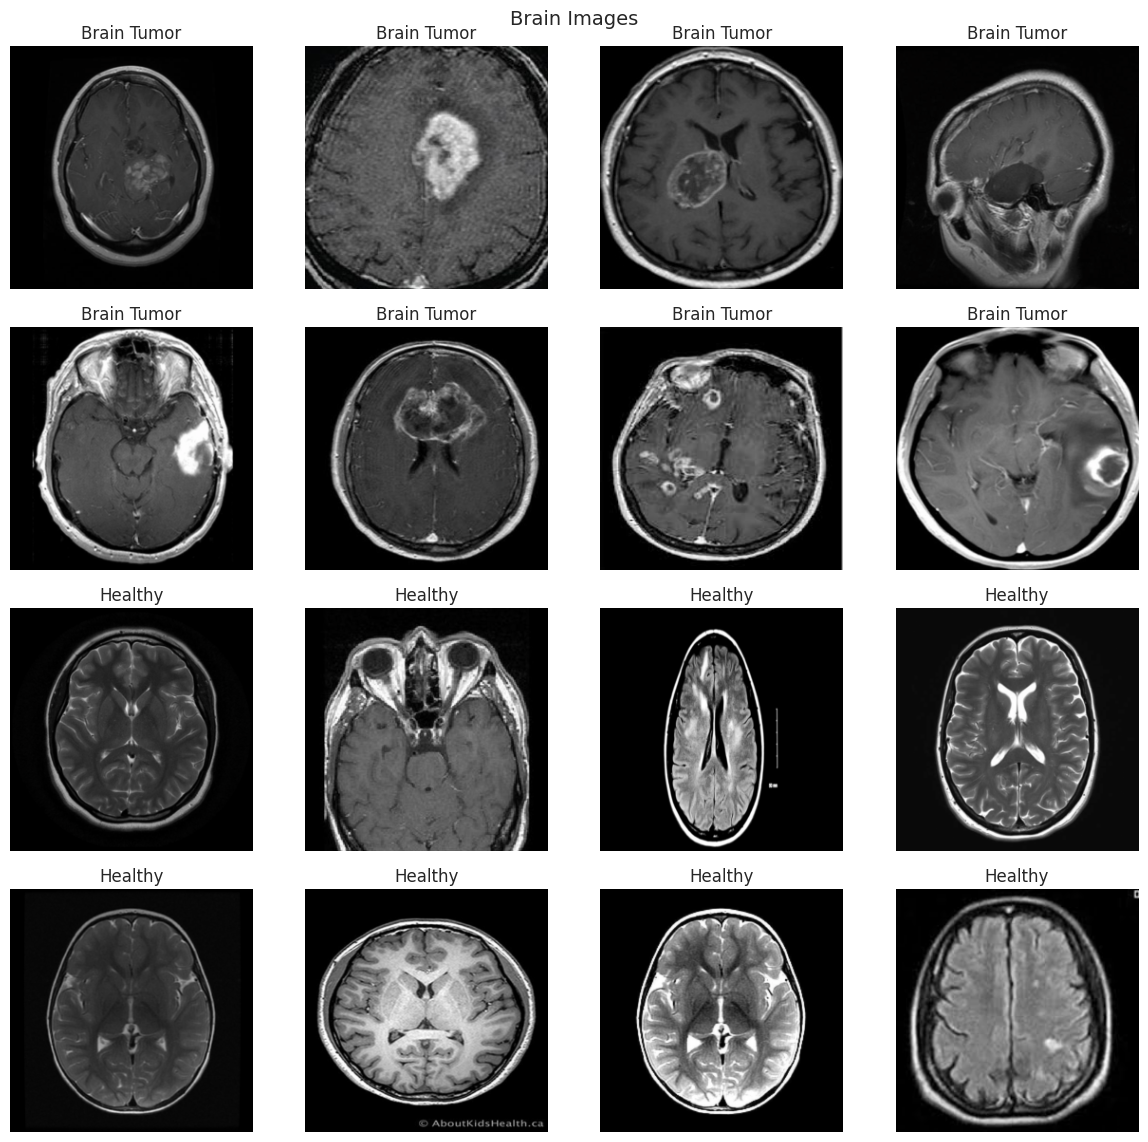

In [19]:
# Visualiztion some images from Train Set, half healthy and half tumor images

########################################
          ### TODO ###
def visualize_samples(dataset, num_samples=16):
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    axes = axes.ravel()

    fig.suptitle('Brain Images', fontsize=14, y=0.95)

    classes = dataset.classes

    class_count = {cls: 0 for cls in classes}
    max_per_class = num_samples // len(classes)

    for idx in range(len(dataset)):
        img, label = dataset[idx]
        class_name = classes[label]

        if class_count[class_name] < max_per_class:
            # De-normalize the image
            img = img * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1) + \
                  torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)

            # Plot the image
            ax_idx = class_count[class_name] + (max_per_class * list(classes).index(class_name))
            # axes[ax_idx].imshow(img_blue.permute(1, 2, 0))
            axes[ax_idx].imshow(img.permute(1, 2, 0).clip(0, 1))
            axes[ax_idx].axis('off')
            axes[ax_idx].set_title(f'{class_name}', pad=5)

            class_count[class_name] += 1

        if all(count >= max_per_class for count in class_count.values()):
            break

    plt.tight_layout()
    plt.subplots_adjust(top=0.92)  # Adjust to prevent title overlap
    plt.show()

# Visualize samples
visualize_samples(train_set)
########################################

In [87]:
train_set.classes

['Brain Tumor', 'Healthy']

## <b>5 <span style='color:#e61227'>|</span> Creating Dataloaders</b>

In [60]:
# import and load train, validation
batch_size = 64

train_loader = torch.utils.data.DataLoader(train_set, batch_size = batch_size, shuffle = True, num_workers = 2)
val_loader = torch.utils.data.DataLoader(val_set, batch_size = batch_size, shuffle = True, num_workers = 2)

In [61]:
# print shape for Training data and Validation data
for key, value in {'Training data': train_loader, "Validation data": val_loader}.items():
    for X, y in value:
        print(f"{key}:")
        print(f"Shape of X : {X.shape}")
        print(f"Shape of y: {y.shape} {y.dtype}\n")
        break

Training data:
Shape of X : torch.Size([64, 3, 256, 256])
Shape of y: torch.Size([64]) torch.int64

Validation data:
Shape of X : torch.Size([64, 3, 256, 256])
Shape of y: torch.Size([64]) torch.int64



## <b>6 <span style='color:#e61227'>|</span> Define Brain Tumor Classifier</b>


In [62]:
'''This function can be useful in determining the output size of a convolutional layer in a neural network,
given the input dimensions and the convolutional layer's parameters. You may not use it in your code'''

def findConv2dOutShape(hin,win,conv,pool=2):
    # get conv arguments
    kernel_size = conv.kernel_size
    stride = conv.stride
    padding = conv.padding
    dilation = conv.dilation

    hout = np.floor((hin+2*padding[0]-dilation[0]*(kernel_size[0]-1)-1)/stride[0]+1)
    wout = np.floor((win+2*padding[1]-dilation[1]*(kernel_size[1]-1)-1)/stride[1]+1)

    if pool:
        hout/=pool
        wout/=pool
    return int(hout),int(wout)

findConv2dOutShape(256,256,nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1))

(128, 128)

In [63]:
# Define any arbitrary Architecture For CNN_TUMOR Model
class CNN_TUMOR(nn.Module):

    # Network Initialisation
    def __init__(self, params):

        super(CNN_TUMOR, self).__init__()

        Cin, Hin, Win = params["shape_in"]
        init_f = params["initial_filters"]
        num_fc1 = params["num_fc1"]
        num_classes = params["num_classes"]
        self.dropout_rate = params["dropout_rate"]

        ########################################
                  ### TODO ###
        # define layers of the model here
        # Convolutional layers
        self.conv1 = nn.Conv2d(Cin, init_f, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(init_f)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(init_f, 2*init_f, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(2*init_f)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(2*init_f, 4*init_f, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(4*init_f)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.conv4 = nn.Conv2d(4*init_f, 8*init_f, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(8*init_f)
        self.pool4 = nn.MaxPool2d(2, 2)

        # Calculate size for fully connected layer
        h, w = Hin, Win
        for i in range(4):  # 4 pooling layers
            h, w = h//2, w//2
        fc_size = (8 * init_f) * h * w

        # Fully connected layers
        self.fc1 = nn.Linear(fc_size, num_fc1)
        self.fc2 = nn.Linear(num_fc1, num_classes)
        self.dropout = nn.Dropout(self.dropout_rate)

        ########################################

    def forward(self,X):

        ########################################
                  ### TODO ###
        # Convolutional layers with ReLU and pooling
        X = self.pool1(F.relu(self.bn1(self.conv1(X))))
        X = self.pool2(F.relu(self.bn2(self.conv2(X))))
        X = self.pool3(F.relu(self.bn3(self.conv3(X))))
        X = self.pool4(F.relu(self.bn4(self.conv4(X))))

        # Flatten
        X = X.view(X.size(0), -1)

        # Fully connected layers
        X = self.dropout(F.relu(self.fc1(X)))
        X = self.fc2(X)

        return X
        ########################################

In [64]:
# define parameters of the model
params_model = {
    "shape_in": (3, 256, 256),  # (channels, height, width)
    "initial_filters": 32,
    "num_fc1": 512,
    "dropout_rate": 0.5,
    "num_classes": 2  # binary classification: tumor vs no tumor
}

# Create instantiation of Network class
cnn_model = CNN_TUMOR(params_model)

# define computation hardware approach (GPU/CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = cnn_model.to(device)

## <b>7 <span style='color:#e61227'>|</span> Loss Function Definition</b>

In [65]:
# define the loss function

loss_func = nn.CrossEntropyLoss()

## <b>8 <span style='color:#e61227'>|</span> Optimiser Definition</b>

In [67]:
# define the optimizer

opt = optim.Adam(model.parameters(), lr=0.001)
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=20, verbose=1)

## <b>9 <span style='color:#e61227'>|</span> Training Model</b>

In [71]:
# Function to compute the loss value per batch of data
def loss_batch(loss_func, output, target):

    ########################################
              ### TODO ###
    loss = loss_func(output, target)
    pred = torch.argmax(output, dim=1)
    metric_b = torch.sum(pred == target).item()
    ########################################

    return loss, metric_b

# Compute the loss value & performance metric for the entire dataset (epoch)
def loss_epoch(model, loss_func, dataset_dl, opt): # dataset_dl: data_loader

    run_loss=0.0 # running loss
    accuracy=0.0
    len_data = len(dataset_dl.dataset)

    # internal loop over dataset

    ########################################
              ### TODO ###
    for xb, yb in dataset_dl:
        xb = xb.to(device)
        yb = yb.to(device)
        output = model(xb)

        loss_b, metric_b = loss_batch(loss_func, output, yb)
        run_loss += loss_b.item()
        accuracy += metric_b

        if opt is not None and model.training:  # Check if model is in training mode
            opt.zero_grad()
            loss_b.backward()
            opt.step()

    loss = run_loss / len(dataset_dl)
    accuracy = accuracy / len_data
    ########################################

    return loss, accuracy

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>9.2 |</span></b> Training Function</b></p>
</div>


In [72]:
def Train_Val(model, train_dl, val_dl, epochs, opt, lr_scheduler, loss_func):
    loss_history={"train": [],"val": []}
    metric_history={"train": [],"val": []}

    # a deep copy of weights for the best performing model
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = float('inf')

    for epoch in tqdm(range(epochs)):

        ########################################
                  ### TODO ###
        # train the model for n epoch. report loss value and accuracy of the model for train and val datasets
        # in each epoch, save the weights of the best model

        # Train
        model.train()
        train_loss, train_metric = loss_epoch(model, loss_func, train_dl, opt)
        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)

        # Validate
        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model, loss_func, val_dl, opt)
        loss_history["val"].append(val_loss)
        metric_history["val"].append(val_metric)

        # Learning rate scheduler step
        lr_scheduler.step(val_loss)

        # Save best model
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
        ########################################

        print(f"train loss: {train_loss:.6f}, train accuracy: {100*train_metric:.2f} , val loss: {val_loss:.6f}, val accuracy: {100*val_metric:.2f}")
        print("-"*10)

    # load best model weights
    model.load_state_dict(best_model_wts)

    return model, loss_history, metric_history

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>9.3 |</span></b> Training Process </b></p>
</div>

In [73]:
# Define parameters used for training and evaluation of a cnn_model
epochs = 20

# train and validate the model
cnn_model, loss_hist, metric_hist = Train_Val(cnn_model, train_loader, val_loader, epochs, opt, lr_scheduler, loss_func)

  0%|          | 0/20 [00:00<?, ?it/s]

train loss: 0.630824, train accuracy: 69.15 , val loss: 0.523302, val accuracy: 74.16
----------
train loss: 0.512669, train accuracy: 73.91 , val loss: 0.465938, val accuracy: 77.09
----------
train loss: 0.462402, train accuracy: 76.22 , val loss: 0.437531, val accuracy: 78.07
----------
train loss: 0.445007, train accuracy: 77.93 , val loss: 0.465270, val accuracy: 77.20
----------
train loss: 0.393130, train accuracy: 81.98 , val loss: 0.395262, val accuracy: 83.17
----------
train loss: 0.370862, train accuracy: 82.11 , val loss: 0.328148, val accuracy: 85.78
----------
train loss: 0.322436, train accuracy: 85.51 , val loss: 0.295081, val accuracy: 86.10
----------
train loss: 0.305297, train accuracy: 85.84 , val loss: 0.253179, val accuracy: 88.27
----------
train loss: 0.262656, train accuracy: 88.04 , val loss: 0.272798, val accuracy: 88.82
----------
train loss: 0.250333, train accuracy: 89.43 , val loss: 0.282983, val accuracy: 89.14
----------
train loss: 0.222719, train ac

## <b>10 <span style='color:#e61227'>|</span> Evaluation Metric Visualization </b>

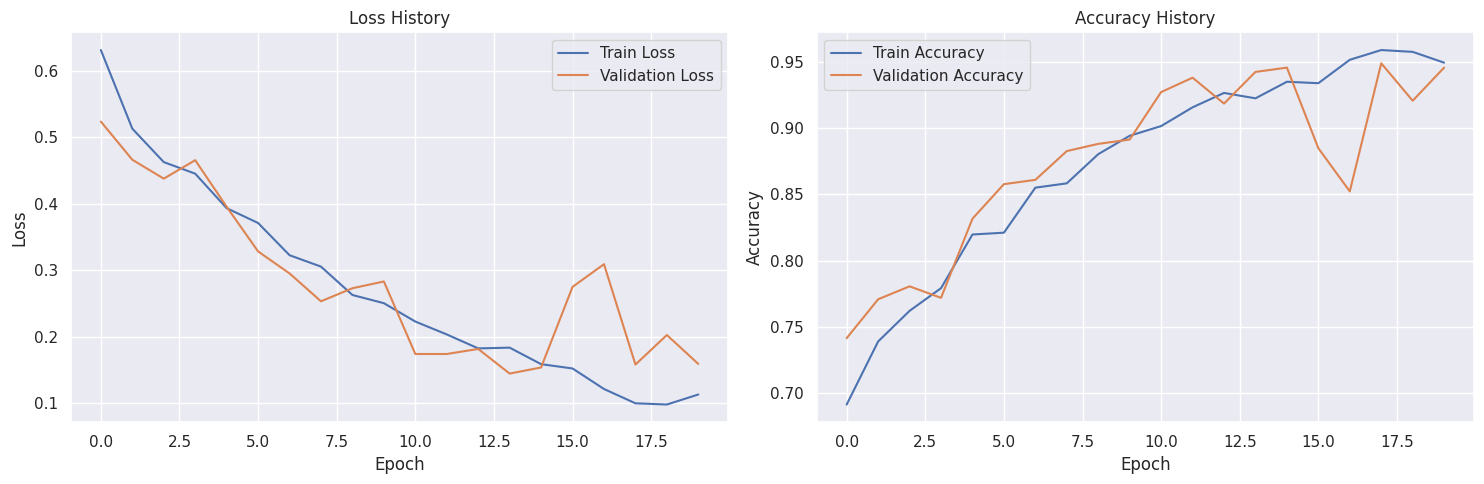

In [75]:
# Convergence History Plot
# plot the loss values and accuracy of your model during the training process

def plot_training_history(loss_hist, metric_hist):
    num_epochs = len(loss_hist["train"])

    plt.figure(figsize=(15, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(range(num_epochs), loss_hist["train"], label="Train Loss")
    plt.plot(range(num_epochs), loss_hist["val"], label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Loss History")

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(num_epochs), metric_hist["train"], label="Train Accuracy")
    plt.plot(range(num_epochs), metric_hist["val"], label="Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Accuracy History")

    plt.tight_layout()
    plt.show()

plot_training_history(loss_hist ,metric_hist)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>10.2 |</span></b> Confusion_Matrix </b></p>
</div>

In [77]:
# define function For Classification Report
def Ture_and_Pred(val_loader, model):
    i = 0
    y_true = []
    y_pred = []

    ########################################
               ### TODO ###
    # calculate prediction and the ground truth for the val dataset.
    model.eval()
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    ########################################

    return y_true, y_pred


def confusion_matrix(y_true, y_pred):

    ########################################
               ### TODO ###
    # calculate confusion matrix
    cm = np.zeros((2, 2), dtype=int)
    for t, p in zip(y_true, y_pred):
        cm[t][p] += 1
    ########################################

    return cm

# check confusion matrix for error analysis
y_true, y_pred = Ture_and_Pred(val_loader, cnn_model)

print(classification_report(y_true, y_pred), '\n\n')
cm = confusion_matrix(y_true, y_pred)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       503
           1       0.94      0.93      0.94       418

    accuracy                           0.94       921
   macro avg       0.94      0.94      0.94       921
weighted avg       0.94      0.94      0.94       921
 




In [79]:
print("confusion matrix:\n")
cm

confusion matrix:



array([[479,  24],
       [ 29, 389]])

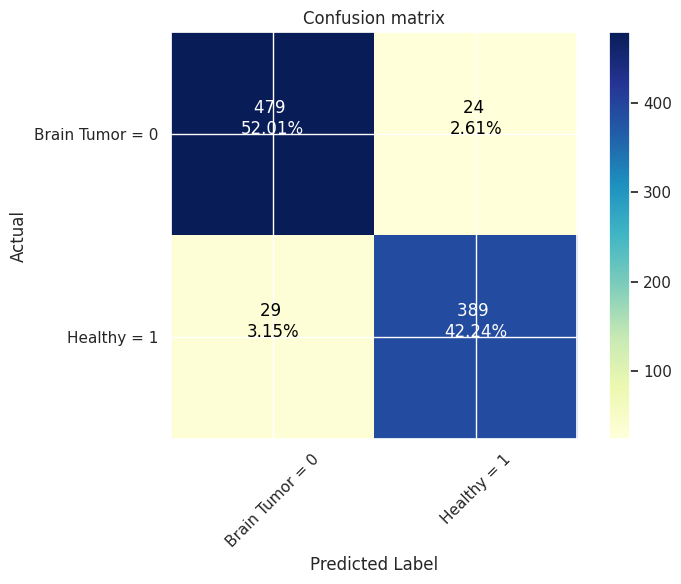

In [88]:
# Confusion Matrix Plotting Function
def show_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.YlGnBu):

    ########################################
               ### TODO ###
    # visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    classes = ['Brain Tumor = 0', 'Healthy = 1']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Add text annotations
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]} \n{cm[i, j] / np.sum(cm) * 100:.2f}%',
                horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual') # True Label
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    ########################################

show_confusion_matrix(cm)